<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Tensorflow_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network Classification with TensorFlow
In this notebook we're going to learn how to write neural network for           Classification Problems.


## Classification Problem:-

* `Email`-'Spam' or 'Not Spam' a perfect example of **Binary classification**.

* `ImageClassification` - like 'Cat' , 'Dog' and 'Person' etc is called **Multiclass Classification**.

* `TagsPrediction` - in a wikipedia page "what tags should this page include?" is called **MultiLabel Classification**. 

In [ ]:
# Creating data to view and fit
from  sklearn .datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)


In [ ]:
# Check features amd labels
X[:5], y[:5]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

#### **Note-** As the given label only include (1,0) this is a binary classification problem

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1]})
circles

,X0,X1
0,0.754246,0.231481
1,-0.756159,0.153259
2,-0.815392,0.173282
3,-0.393731,0.692883
4,0.442208,-0.896723
...,...,...
995,0.244054,0.944125
996,-0.978655,-0.272373
997,-0.136900,-0.810012
998,0.670362,-0.767502


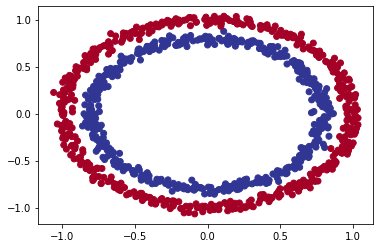

In [ ]:
# Visualise the dataframe
import matplotlib.pyplot as plt
plt.scatter(circles['X0'],circles['X1'],c=y,cmap=plt.cm.RdYlBu)

### **Exercise-** we have to create a model that predicts the color of the given point of the cirle as shown above red='1' and blue='0'

## Input  & Output shapes

In [ ]:
# Input shape(Features)
X.shape

(1000, 2)

In [ ]:
# Output Shape (Labels)
y.shape


(1000,)

## BinaryClassification Model Creation


Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5190
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5120
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5000
Epoch 11/

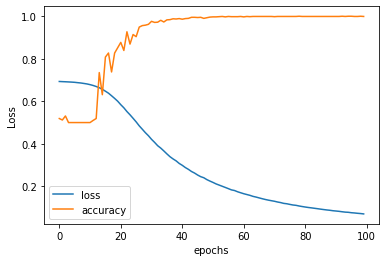

In [ ]:

import tensorflow as tf
# Model random seed
tf.random.set_seed(42)

# Model layers
B_Model = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,),name='Input_layer'),
                               tf.keras.layers.Dense(100,activation='relu',name='D1'),
                               tf.keras.layers.Dense(2,activation='relu',name='D2'),
                               tf.keras.layers.Dense(1,activation='sigmoid',name='Output_layer')],name = 'BinaryClassification_Model') 
B_Model.compile(loss='BinaryCrossentropy',optimizer='Adam',metrics='accuracy')

# Fit the Model
history = B_Model.fit(circles,y,epochs=100)
# Visualize loss
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()


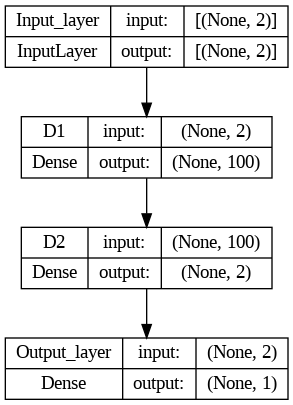

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(B_Model,show_shapes=True)

In [ ]:
# Evaluate model
B_Model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 1.0000


[0.0550854429602623, 1.0]

To visualize  our Model's predictions, let's create a function `plot_desision_boundary()` this function will :-
* Take in a Trained Model ,features (X) and labels (y).
* Create a meshgrid of different X values.
* Make predictions across the Meshgrid
* Plot the predictions as well as a line btw zones(where each unique class falls).


In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """ Plots the decision boundary by the model predicting on X """
  # Define the asis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  # Create X value(we're going to make prediction on these)
  x_in =np.c_[xx.ravel(),yy.ravel()] # stack 2d array in one array

  #make Prediction
  y_pred = model.predict(x_in)

  #check for multi-class problem
  if  len(y_pred[0])>1:
    print("Doing Multiclass Classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu ,alpha =0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




313/313 [==============================] - 0s 1ms/step
Doing binary Classification


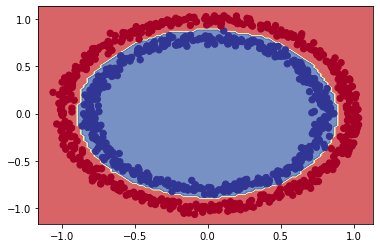

In [ ]:
plot_decision_boundary(B_Model,X,y)

# Non-Linearity
**Reference before modeling-** [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40569&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


Next Model playground Accuracy:-[All parameters are set](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40569&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# lets create a model  after check it in playground same as the set parameters
# Random Seed
tf.random.set_seed(42)
# layering
model_1= tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                              tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(2,activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(1,activation='sigmoid')                           
])
#compiling
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#fitting
history = model_1.fit(X,y,epochs=115)

Epoch 1/115
32/32 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5010
Epoch 2/115
32/32 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5590
Epoch 3/115
32/32 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5560
Epoch 4/115
32/32 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6390
Epoch 5/115
32/32 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7090
Epoch 6/115
32/32 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7120
Epoch 7/115
32/32 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7640
Epoch 8/115
32/32 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7970
Epoch 9/115
32/32 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8090
Epoch 10/115
32/32 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8380
Epoch 11/

<Axes: >

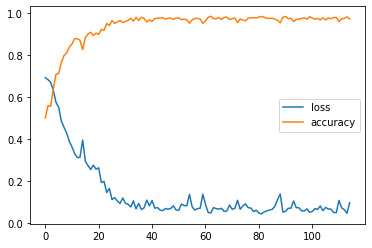

In [ ]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 0s 1ms/step
Doing binary Classification


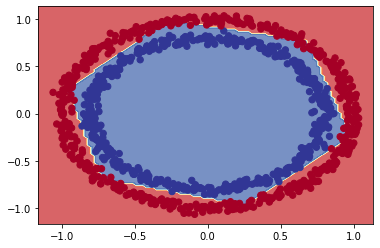

In [ ]:
#Visualize the accuracy on data
plot_decision_boundary(model_1,X,y)